funcion crear lineas contorno superpixeles

Imports generales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

from scipy import ndimage


Imports gestion de bordes

In [2]:
from ipynb.fs.full.bordes import genera_bordes
from ipynb.fs.full.bordes import genera_bordes2
from ipynb.fs.full.bordes import calcula_bordes_5



Imports preprocesado de imágenes

In [3]:
from ipynb.fs.full.preprocesado import normalizar_color
from ipynb.fs.full.preprocesado import mejorar_contraste
from ipynb.fs.full.preprocesado import fun_filtro_gaussiano
from ipynb.fs.full.preprocesado import muestra_bordesR

Imports lectura de fotos

In [4]:
from ipynb.fs.full.Carga_fotos import carga_fotos

Imports conbinación segmentaciones

In [5]:
from ipynb.fs.full.Megapixels import mas_superpixeles
from ipynb.fs.full.Megapixels import elimino1
from ipynb.fs.full.Megapixels import reordenar
 

Imports tests

In [6]:
from ipynb.fs.full.Tests import test_BR
from ipynb.fs.full.Tests import ASA

Aplicamos a la imagen varios métodos de generación de superpixeles.
Cargamos librerías e imagen de prueba

In [7]:
#para FH
from skimage.segmentation import felzenszwalb
from skimage.color import label2rgb
from skimage import io

In [8]:
#para SLIC
from skimage.segmentation import slic
from skimage import io


In [ ]:
#para Quickshift
from skimage.segmentation import quickshift

In [9]:

# Cargamos la imagen de secuencia
donde=str(np.load(os.path.join("donde.npy")))
imagen_original=str(np.load(os.path.join('archivo_jpg.npy')))
imagen_referencia=str(np.load(os.path.join('archivo_mat.npy')))

imagen,image_G_S,bordes_image_G_S=carga_fotos(imagen_original,imagen_referencia,donde)

In [10]:
#preprocesamos la imagen filtro gausiano, normalizado y mejora de contraste

kernel_size=5
imagen_filtrada_rgb = fun_filtro_gaussiano(imagen, kernel_size)
# print ("Imagen inicial: ",imagen.shape,type(imagen))
# print ("Imagen filtrada: ",imagen_filtrada_rgb.shape,type(imagen_filtrada_rgb))

imagen_normalizada_rgb=normalizar_color(imagen_filtrada_rgb)

alpha=1.25
beta=-20
image=mejorar_contraste(imagen_normalizada_rgb,alpha,beta)

#image=resalte_bordes(imagen_mejorada)


(-0.5, 320.5, 480.5, -0.5)

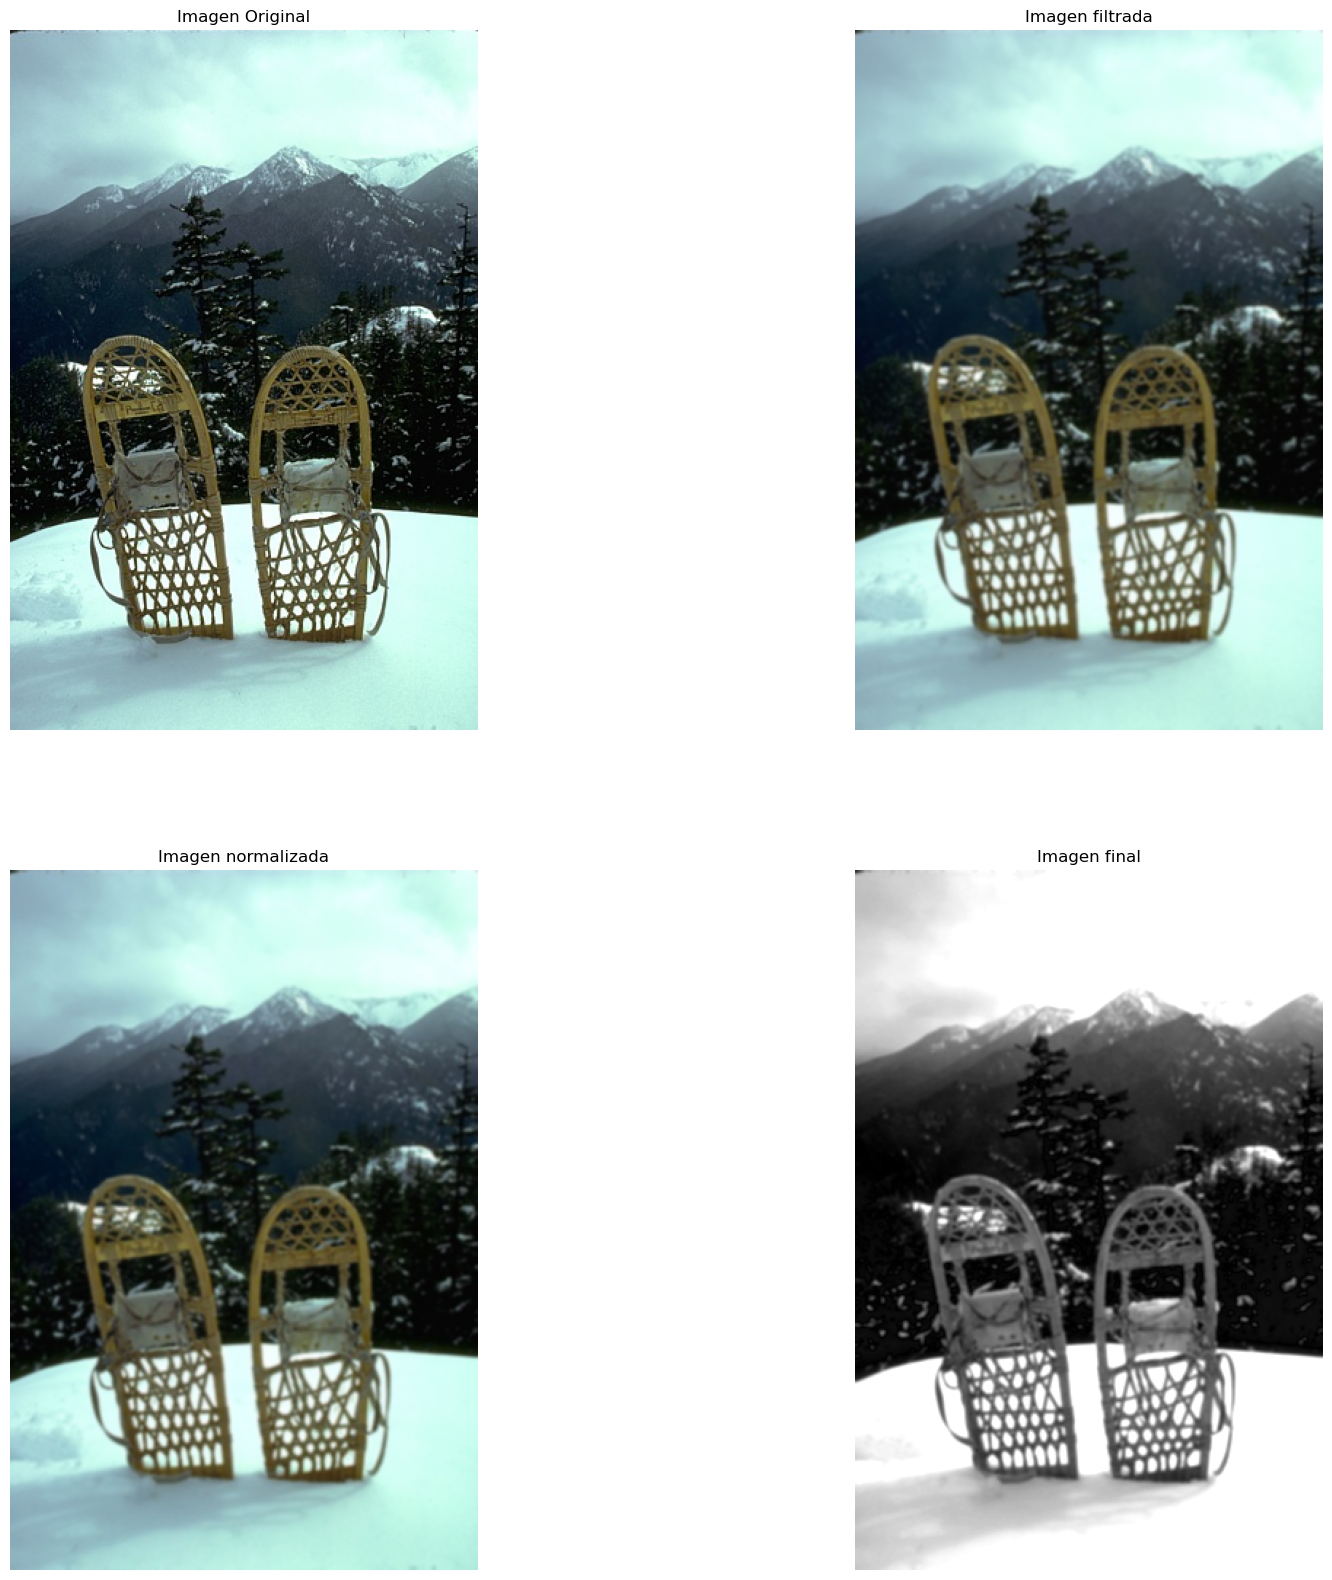

In [13]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title('Imagen Original')
plt.imshow(imagen)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Imagen filtrada')
plt.imshow(imagen_filtrada_rgb)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Imagen normalizada')
plt.imshow(imagen_normalizada_rgb)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Imagen final')
plt.imshow(image[:,:,1], cmap="grey")
plt.axis('off')

In [14]:
#guardamos la imagen que esamos usando en intercambio
inter="compartir"
nombre="image.jpg"
path=os.path.join(inter,nombre)
io.imsave(path,image)
io.imsave(os.path.join(inter,'imagen_org.jpg'),imagen)
np.save(os.path.join(inter,'image_G_S.npy'), image_G_S)
np.save(os.path.join(inter,'bordes_image_G_S.npy'), bordes_image_G_S)

In [15]:
N=150

Metodo 1:FH

In [16]:
# Parámetros del algoritmo FH
scale = 50# Parámetro de escala 
min_size = 150 # Tamaño mínimo de un superpíxel 

# Segmentación de la imagen en superpíxeles
segments_FH = felzenszwalb(image, scale=scale, min_size=min_size)

#sumamos 1 para que la segmentación no empiece en 0
segments_FH=segments_FH+1

# Visualización de los superpíxeles
segmentation_FH = label2rgb(segments_FH, image, kind='avg')

# Guarda la imagen segmentada en superpíxeles
io.imsave(os.path.join(inter,'segmentation_FH.jpg'), segmentation_FH)
np.save(os.path.join(inter,'segments_FH.npy'), segments_FH)


In [17]:
#Genero los bordes
bordes_FH=genera_bordes(segments_FH)
bordes_FH2=genera_bordes2(segments_FH)

In [18]:
# Muestra la imagen original, la segmentada y los bordes
# plt.figure(figsize=(20, 20))
# plt.subplot(2,2, 1)
# plt.title('Imagen Original')
# plt.imshow(image)
# plt.axis('off')

# plt.subplot(2,2, 2)
# plt.title('Imagen Segmentada')
# plt.imshow(segmentation_FH)
# plt.axis('off')

# plt.subplot(2,2, 3)
# plt.title('Imagen Segmentos')
# plt.imshow(segments_FH)
# plt.axis('off')

# plt.subplot(2,2, 4)
# plt.title('Imagen bordes')
# plt.imshow(bordes_FH, cmap="grey")
# plt.axis('off')

plt.show()

print("Nº Superpixeles: ",np.max(segments_FH))

Nº Superpixeles:  120


In [19]:
#guardo los bordes
np.save(os.path.join(inter,'bordes_FH.npy'), bordes_FH)
np.save(os.path.join(inter,'bordes_FH2.npy'), bordes_FH2)


In [20]:
np.unique(bordes_FH)

array([0., 1.])

In [21]:
imagen_original

'2018.jpg'

In [22]:
#Genero imagen para la memoria
imagen_aux=muestra_bordesR(bordes_FH, imagen)

# plt.figure(figsize=(20, 20))
# plt.title('Imagen FH')
# plt.imshow(imagen_aux)
# plt.axis('off')

#guardado de imagenes para memoria
memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"segmentacion_FH_"+ imagen_original[:-4]+".jpg"), imagen_aux)

Metodo 2:SLIC

In [23]:
# Parámetros del algoritmo SLIC
n_segments = N  # Número de superpíxeles 
compactness = 20  # Compacidad 

# Segmentación de la imagen en superpíxeles utilizando el algoritmo SLIC
segments_SLIC = slic(image, n_segments=n_segments, compactness=compactness)

# Visualización de los superpíxeles
segmentation_SLIC = label2rgb(segments_SLIC, image, kind='avg')

# Guardar la imagen segmentada en superpíxeles
io.imsave(os.path.join(inter,'segmentation_SLIC.jpg'), segmentation_SLIC)
np.save(os.path.join(inter,'segments_SLIC'), segments_SLIC)

In [24]:
#Generamos los bordes
bordes_SLIC=genera_bordes(segments_SLIC)
bordes_SLIC2=genera_bordes2(segments_SLIC)

In [25]:
# Muestra la imagen original, la segmentada y los bordes
# plt.figure(figsize=(20, 20))
# plt.subplot(2,2, 1)
# plt.title('Imagen Original')
# plt.imshow(image)
# plt.axis('off')

# plt.subplot(2,2, 2)
# plt.title('Imagen Segmentada')
# plt.imshow(segmentation_SLIC)
# plt.axis('off')

# plt.subplot(2,2, 3)
# plt.title('Imagen Segmentos')
# plt.imshow(segments_SLIC)
# plt.axis('off')

# plt.subplot(2,2, 4)
# plt.title('Imagen bordes')
# plt.imshow(bordes_SLIC, cmap="grey")
# plt.axis('off')

# plt.show()

print("Nº Superpixeles SLIC: ",np.max(segments_SLIC))

Nº Superpixeles SLIC:  129


In [26]:
#Genero imagen para la memoria
imagen_aux=muestra_bordesR(bordes_SLIC, imagen)

# plt.figure(figsize=(20, 20))
# plt.title('Imagen FH')
# plt.imshow(imagen_aux)
# plt.axis('off')

#guardado de imagenes para memoria
memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"segmentacion_SLIC_"+ imagen_original[:-4]+".jpg"), imagen_aux)


Metodo 3:SEEDS

In [27]:
#guardo los bordes
np.save(os.path.join(inter,'bordes_SLIC.npy'), bordes_SLIC)
np.save(os.path.join(inter,'bordes_SLIC2.npy'), bordes_SLIC2)


In [29]:
# Parámetros para la segmentación en superpíxeles
num_superpixels = int(N*1.5) # Número deseado de superpíxeles 
num_levels = 4  # Número de niveles de escala 
prior = 2  # Peso para la coherencia espacial 
num_histogram_bins = 5  # Número de contenedores de histograma 

#como es opencv las imagenes procesadas mejor en BGR
imagen_cv2 = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Crear un objeto para la segmentación en superpíxeles SEEDS
seeds = cv2.ximgproc.createSuperpixelSEEDS(imagen_cv2.shape[1], imagen_cv2.shape[0], imagen_cv2.shape[2], num_superpixels, num_levels, prior, num_histogram_bins)

# Inicializar SEEDS con la imagen
seeds.iterate(imagen_cv2, num_iterations=5)  # Número de iteraciones (ajusta según sea necesario)

# Obtener la máscara de superpíxeles
segments_SEEDS= seeds.getLabels()

#Sumo 1 a la segmentación para que no empiece en 0
segments_SEEDS=segments_SEEDS+1


# Superponer los contornos en la imagen original
result = cv2.cvtColor(imagen_cv2, cv2.COLOR_BGR2RGB)
#result[mask == 256] = [0, 0, 255]  # Color rojo para los contornos

segmentation_SEEDS = label2rgb(segments_SEEDS, image, kind='avg')

io.imsave(os.path.join(inter,'segmentation_SEEDS.jpg'), segmentation_SEEDS)
np.save(os.path.join(inter,'segments_SEEDS.npy'), segments_SEEDS)

In [30]:
#Generamos bordes
bordes_SEEDS=genera_bordes(segments_SEEDS)
bordes_SEEDS2=genera_bordes2(segments_SEEDS)

In [31]:
# Muestra la imagen original, la segmentada y los bordes
# plt.figure(figsize=(20, 20))
# plt.subplot(2,2, 1)
# plt.title('Imagen Original')
# plt.imshow(image)
# plt.axis('off')

# plt.subplot(2,2, 2)
# plt.title('Imagen Segmentada')
# plt.imshow(segmentation_SEEDS)
# plt.axis('off')

# plt.subplot(2,2, 3)
# plt.title('Imagen Segmentos')
# plt.imshow(segments_SEEDS)
# plt.axis('off')

# plt.subplot(2,2, 4)
# plt.title('Imagen bordes')
# plt.imshow(bordes_SEEDS, cmap="grey")
# plt.axis('off')

# plt.show()

print("Nº Superpixeles SEEDS: ",np.max(segments_SEEDS))

Nº Superpixeles SEEDS:  150


In [32]:
#Genero imagen para la memoria
imagen_aux=muestra_bordesR(bordes_SEEDS, imagen)

# plt.figure(figsize=(20, 20))
# plt.title('Imagen SEEDS')
# plt.imshow(imagen_aux)
# plt.axis('off')

#guardado de imagenes para memoria
memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"segmentacion_SEEDS_"+ imagen_original[:-4]+".jpg"), imagen_aux)


In [33]:
segments_SEEDS.max()

150

In [34]:
#guardo los bordes
np.save(os.path.join(inter,'bordes_SEEDS.npy'), bordes_SEEDS)
np.save(os.path.join(inter,'bordes_SEEDS2.npy'), bordes_SEEDS2)

Metodo 4:Quickshift

In [36]:
# Parámetros del algoritmo Quickshift
ratio = 0.7 # Razón de compactación 
kernel_size = 14  # Tamaño del kernel 
max_dist = 7  # Distancia máxima (ajusta según sea necesario)

# Segmentación de la imagen en superpíxeles utilizando el algoritmo Quickshift
segments_QS = quickshift(image, ratio=ratio, kernel_size=kernel_size, max_dist=max_dist)

#Sumamos 1 a la segmentación para que no empiece en 0
segments_QS=segments_QS+1

# Visualización de los superpíxeles
segmentation_QS = label2rgb(segments_QS+1, image, kind='avg')

io.imsave(os.path.join(inter,'segmentation_QS.jpg'), segmentation_QS)
np.save(os.path.join(inter,'segments_QS.npy'), segments_QS)

In [37]:
#Genera bordes
bordes_QS=genera_bordes(segments_QS)
bordes_QS2=genera_bordes2(segments_QS)

In [38]:
# Muestra la imagen original, la segmentada y los bordes
# plt.figure(figsize=(20, 20))
# plt.subplot(2,2, 1)
# plt.title('Imagen Original')
# plt.imshow(image)
# plt.axis('off')

# plt.subplot(2,2, 2)
# plt.title('Imagen Segmentada')
# plt.imshow(segmentation_QS)
# plt.axis('off')

# plt.subplot(2,2, 3)
# plt.title('Imagen Segmentos')
# plt.imshow(segments_QS)
# plt.axis('off')

# plt.subplot(2,2, 4)
# plt.title('Imagen bordes')
# plt.imshow(bordes_QS, cmap="grey")
# plt.axis('off')

# plt.show()

print("Nº Superpixeles QS: ",np.max(segments_QS))

Nº Superpixeles QS:  198


In [39]:
#Genero imagen para la memoria
imagen_aux=muestra_bordesR(bordes_QS, imagen)

# plt.figure(figsize=(20, 20))
# plt.title('Imagen QS')
# plt.imshow(imagen_aux)
# plt.axis('off')

#guardado de imagenes para memoria
memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"segmentacion_QS_"+ imagen_original[:-4]+".jpg"), imagen_aux)


## Resumen segmentaciones simples

In [40]:
print("Datos FH")
r_FH,p_FH=test_BR(bordes_FH,bordes_image_G_S)
print("segmentos:",np.max(segments_FH))
asa_FH=ASA(segments_FH,image_G_S)

print("Datos SLIC")
r_SLIC,p_SLIC=test_BR(bordes_SLIC,bordes_image_G_S)
print("segmentos:",np.max(segments_SLIC))
asa_SLIC=ASA(segments_SLIC,image_G_S)

print("Datos SEEDS")
r_SEEDS,p_SEEDS=test_BR(bordes_SEEDS,bordes_image_G_S)
print("segmentos:",np.max(segments_SEEDS))
asa_SEEDS=ASA(segments_SEEDS,image_G_S)

print("Datos QS")
r_QS,p_QS=test_BR(bordes_QS,bordes_image_G_S)
print("segmentos:",np.max(segments_QS))
asa_QS=ASA(segments_QS,image_G_S)


Datos FH
recall: 0.8386
precision: 0.3255
segmentos: 120
aciertos:  144036 total:  154401 ASA: 0.9329
Datos SLIC
recall: 0.6674
precision: 0.3218
segmentos: 129
aciertos:  141745 total:  154401 ASA: 0.918
Datos SEEDS
recall: 0.7605
precision: 0.2934
segmentos: 150
aciertos:  140212 total:  154401 ASA: 0.9081
Datos QS
recall: 0.7832
precision: 0.4455
segmentos: 198
aciertos:  138665 total:  154401 ASA: 0.8981


0.8981

In [ ]:
#grabamos los datos por imagen para agregarlos despues.
datos_FH=np.array([r_FH,p_FH,np.max(segments_FH),asa_FH])
datos_SLIC=np.array([r_SLIC,p_SLIC,np.max(segments_SLIC),asa_SLIC])
datos_SEEDS=np.array([r_SEEDS,p_SEEDS,np.max(segments_SEEDS),asa_SEEDS])
datos_QS=np.array([r_QS,p_QS,np.max(segments_QS),asa_QS])


ruta_datos="info_imagenes_test"
#np.savetxt(os.path.join(ruta_datos,"intercambio_fase0"+".csv"), datos_fase0, delimiter=',')
np.savetxt(os.path.join(ruta_datos,"intercambio_fase0_FH"+".csv"), datos_FH, delimiter=',')
np.savetxt(os.path.join(ruta_datos,"intercambio_fase0_SLIC"+".csv"), datos_SLIC, delimiter=',')
np.savetxt(os.path.join(ruta_datos,"intercambio_fase0_SEEDS"+".csv"), datos_SEEDS, delimiter=',')
np.savetxt(os.path.join(ruta_datos,"intercambio_fase0_QS"+".csv"), datos_QS, delimiter=',')

In [41]:
#Comprobamos que las imagenes son compatibles
print(bordes_FH2.shape,bordes_SLIC2.shape,bordes_SEEDS2.shape,bordes_QS2.shape)

(481, 321) (481, 321) (481, 321) (481, 321)


(-0.5, 320.5, 480.5, -0.5)

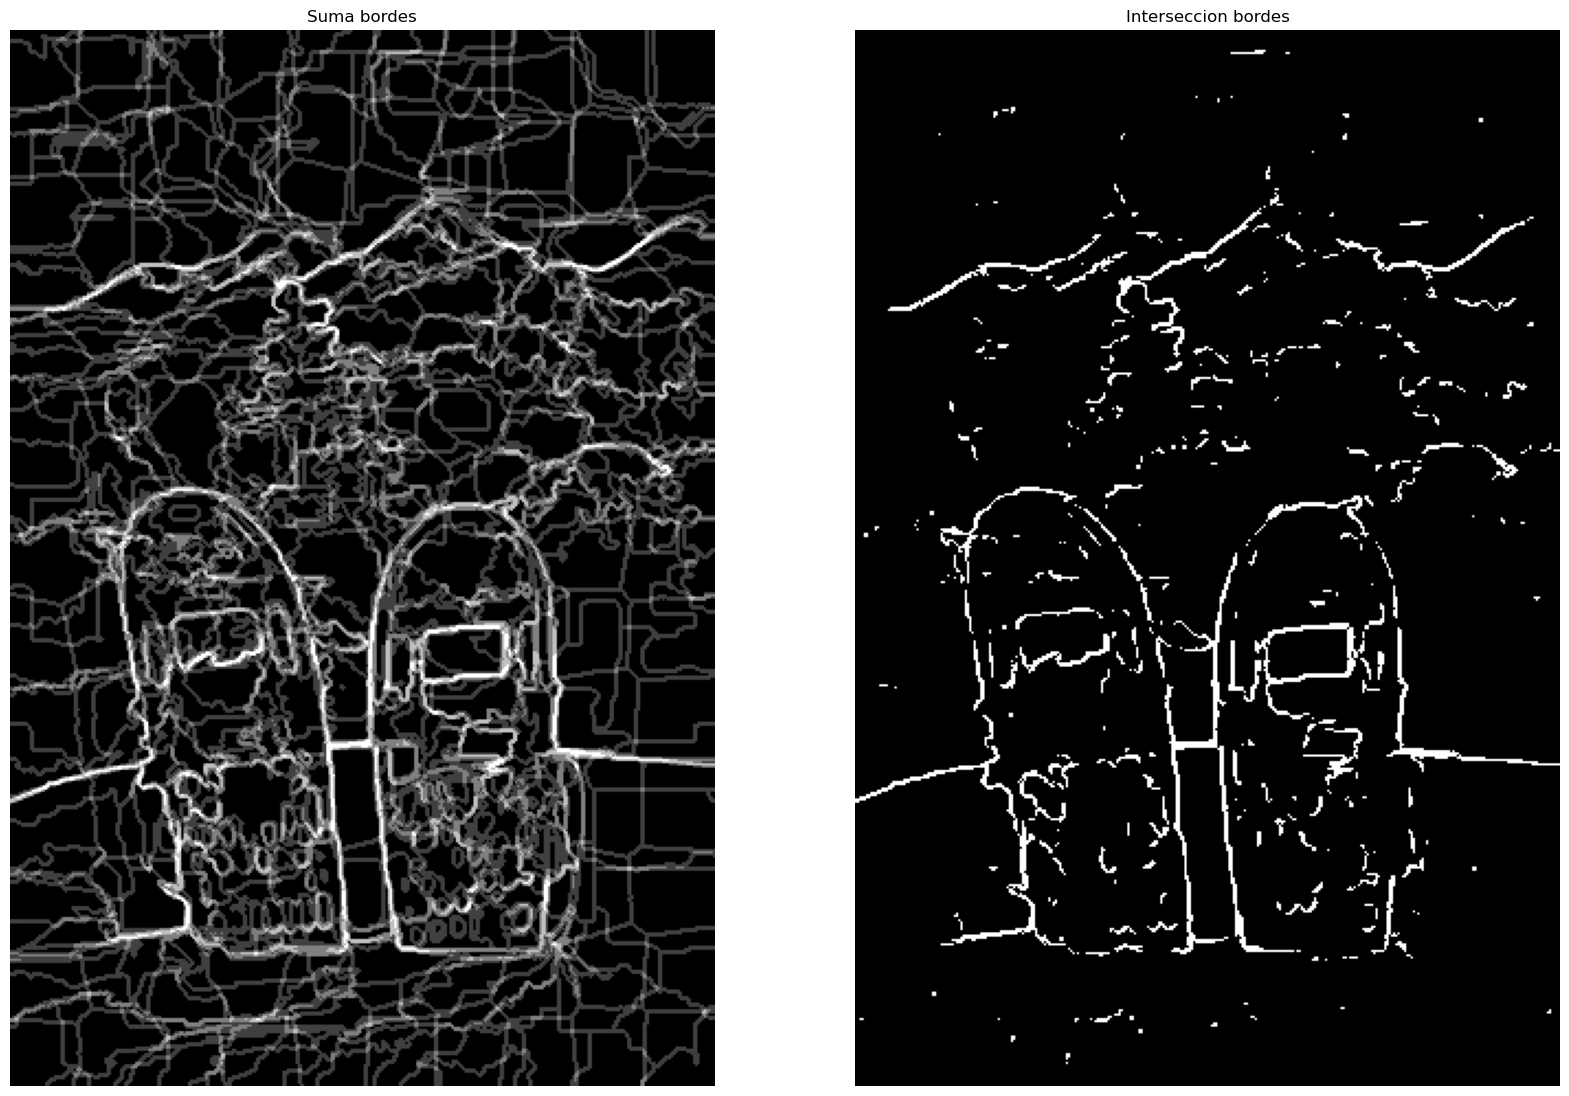

In [42]:
#Calulamos el nuevo borde como composición de los demás.

treshold=0.6 #mas de 2 segmentaciones tienen que coincidir
sum_bordes,int_bordes=calcula_bordes_5(treshold,bordes_FH2,bordes_SLIC2,bordes_SEEDS2,bordes_QS2)

plt.figure(figsize=(20, 20))
plt.subplot(1,2, 1)
plt.title('Suma bordes')
plt.imshow(sum_bordes, cmap="grey")
plt.axis('off')

plt.subplot(1,2, 2)
plt.title('Interseccion bordes')
plt.imshow(int_bordes, cmap="grey")
plt.axis('off')


In [43]:
#guardo los bordes generados
np.save(os.path.join(inter,'sum_bordes.npy'), sum_bordes)
np.save(os.path.join(inter,'int_bordes1.npy'), int_bordes)

In [44]:
#comprobamos los tamaños de las imagenes cargadas
print("Tamaño imagen: ",image.shape)
print("Tamaño segmentacion: ",image_G_S.shape)
print("Tamaño bordes: ",bordes_image_G_S.shape)

Tamaño imagen:  (481, 321, 3)
Tamaño segmentacion:  (481, 321)
Tamaño bordes:  (481, 321)


(-0.5, 320.5, 480.5, -0.5)

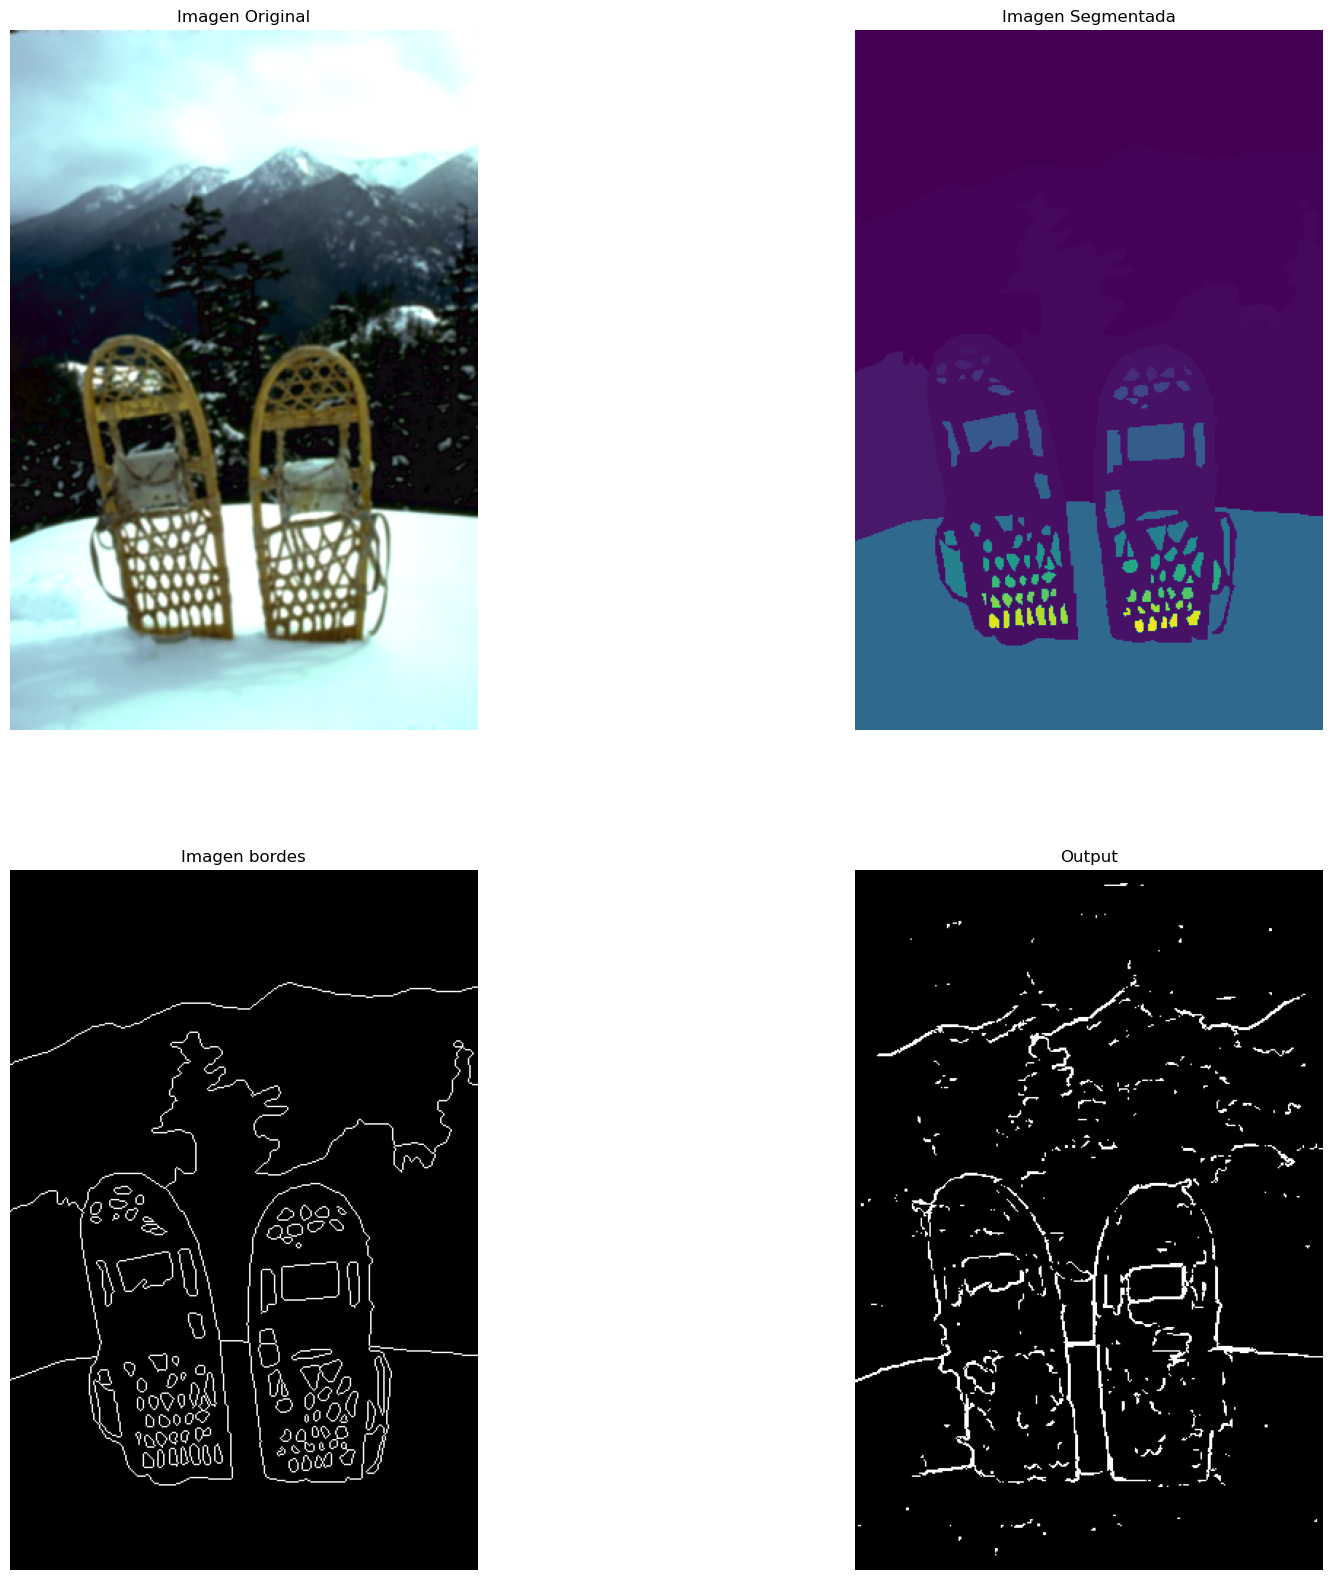

In [45]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title('Imagen Original')
plt.imshow(image)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Imagen Segmentada')
plt.imshow(image_G_S)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Imagen bordes')
plt.imshow(bordes_image_G_S,cmap="grey")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Output')
plt.imshow(int_bordes,cmap="grey")
plt.axis('off')

In [46]:
def ver_bordes (imagen1=[],imagen2=[],imagen3=[],imagen4=[]):
    """Funcion para ver de distintos colores en una imagen los bordes generados
    de 5 imágenes"""
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    
    forma=(imagen1.shape[0],imagen1.shape[1],3)
    print("forma:",forma)
    #estructura RGB
    imagen_com=np.zeros((forma))
    
    #imagen1 será roja
    imagen_com[:,:,0]=+imagen1[:,:]
    
    #imagen2 será verde
    imagen_com[:,:,1]=+imagen2[:,:]
    
    #imagen3 será azul
    imagen_com[:,:,2]=+imagen3[:,:]
    
    #imagen4 será magenta
    imagen_com[:,:,0]=+imagen4[:,:]
    imagen_com[:,:,2]=+imagen4[:,:]
    
    
    imagen_com=np.where(imagen_com > 1,1,imagen_com)
    
    plt.figure(figsize=(20, 30))
    plt.subplot(2, 2, 1)
    plt.title('Imagen1')
    plt.imshow(imagen1,cmap="grey")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Imagen2')
    plt.imshow(imagen2,cmap="grey")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Imagen3')
    plt.imshow(imagen3,cmap="grey")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title("Imagen4")
    plt.imshow(imagen4,cmap="grey")
    plt.axis('off')
    
    plt.figure(figsize=(30, 30))
    plt.title('Composicion bordes')
    plt.imshow(imagen_com)
    plt.axis('off')
    

In [47]:
# ver_bordes(bordes_FH2,bordes_SLIC2,bordes_SEEDS2,bordes_QS2)

In [48]:
def test_segmentacion(segmentacion):
    """Comprueba que las segmentaciones no generan mas de una zona quedando al menos 2 inconexas"""
    test=0
    for seg in np.unique(segmentacion):
        mask=(np.where(segmentacion==seg,255,0)).astype(np.uint8)
        contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if len(contornos)>1:
            #print("segmentacion: ",seg,"cantidad contornos internos: ",len(contornos))
            test+=1
    if test==0: print("OK")
    else: print("segmentos no conexos: ",test) 

In [49]:
def aregla_segmentacion(segmentacion):
    """Corrige las segementaciones con areas inconexas asignando nuevos valores dejando todos los segmentos conexos"""
    for seg in np.unique(segmentacion):
#         print("elementos:",np.count_nonzero(segmentacion==seg))
        mask=(np.where(segmentacion==seg,255,0)).astype(np.uint8)
#         print(np.unique(mask))
        labeled_image, num_features = ndimage.label(mask)
#         print("segmentacion: ",seg,"cantidad contornos internos: ",num_features)
        if num_features>1:            
            for sub in np.unique(labeled_image):
#                 print("tamaño:",sub,"pixeles:",np.count_nonzero(labeled_image==sub))
                if sub>1:
                    segmentacion=np.where(labeled_image==sub,np.max(np.unique(segmentacion))+1,segmentacion)
#                     print("cambio subconjunto:",sub,"con valor: ",seg, "por: ",np.max(np.unique(segmentacion))+1)
#     print(segmentacion,segmentacion.shape)
    segmentacion=segmentacion.astype(int)
    return segmentacion

In [50]:
#genero uniones de superpixeles

#todos unidos

n_segments=mas_superpixeles(segments_FH,segments_SLIC,segments_SEEDS,segments_QS)

#unidos dos a dos (pareja de tecnicas diferentes conceptualmente)

n_segments_FSL=mas_superpixeles(segments_FH,segments_SLIC,segments_FH,segments_SLIC)
n_segments_FSE=mas_superpixeles(segments_FH,segments_SEEDS,segments_FH,segments_SEEDS)
n_segments_FQ=mas_superpixeles(segments_FH,segments_QS,segments_FH,segments_QS)


n_bordes=genera_bordes(n_segments)
n_bordes_2=genera_bordes2(n_segments)

n_bordes_FSL=genera_bordes(n_segments_FSL)
n_bordes_FSL_2=genera_bordes2(n_segments_FSL)
n_bordes_FSE=genera_bordes(n_segments_FSE)
n_bordes_FSE_2=genera_bordes2(n_segments_FSE)
n_bordes_FQ=genera_bordes(n_segments_FQ)
n_bordes_FQ_2=genera_bordes2(n_segments_FQ)


In [51]:
test_segmentacion(n_segments)
test_segmentacion(n_segments_FSL)
test_segmentacion(n_segments_FSE)
test_segmentacion(n_segments_FQ)


segmentos no conexos:  762
segmentos no conexos:  208
segmentos no conexos:  237
segmentos no conexos:  209


In [52]:
n_segments=aregla_segmentacion(n_segments)
n_segments_FSL=aregla_segmentacion(n_segments_FSL)
n_segments_FSE=aregla_segmentacion(n_segments_FSE)
n_segments_FQ=aregla_segmentacion(n_segments_FQ)


In [53]:
test_segmentacion(n_segments)
test_segmentacion(n_segments_FSL)
test_segmentacion(n_segments_FSE)
test_segmentacion(n_segments_FQ)


OK
OK
OK
OK


In [54]:
len(np.unique(n_segments))

4907

In [55]:
np.max(n_segments)

4906

In [56]:
np.unique(n_segments)

array([   0,    1,    2, ..., 4904, 4905, 4906])

In [57]:
n_segments=n_segments.astype(int)
n_segments=n_segments+1

In [58]:
n_segmentation = label2rgb(n_segments, image, kind='avg')

In [59]:
# plt.figure(figsize=(30, 30))
# plt.subplot(2, 1, 1)
# plt.title('Nueva segmentacion Todos')
# plt.imshow(n_bordes,cmap="grey")
# plt.axis('off')

# plt.subplot(2, 1, 2)
# plt.title('Nueva imagen segmentacion Todos')
# plt.imshow(n_segmentation)
# plt.axis('off')


In [60]:
#Genero imagen para la memoria
imagen_aux=muestra_bordesR(n_bordes, imagen)

# plt.figure(figsize=(20, 20))
# plt.title('Imagen Todos')
# plt.imshow(imagen_aux)
# plt.axis('off')

#guardado de imagenes para memoria
memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"segmentacion_todos_"+ imagen_original[:-4]+".jpg"), imagen_aux)


## Resumen Todos

In [61]:
print("Datos Todos")
r_todos,p_todos=test_BR(n_bordes,bordes_image_G_S)
print("segmentos:",np.max(n_segments))
asa_todos=ASA(n_segments,image_G_S)


Datos Todos
recall: 0.9715
precision: 0.1622
segmentos: 4907
aciertos:  148996 total:  154401 ASA: 0.965


0.965

In [ ]:
#grabamos los datos por imagen para agregarlos despues.
datos_todos=np.array([r_todos,p_todos,np.max(n_segments),asa_todos])

print(datos_todos)

ruta_datos="info_imagenes_test"
np.savetxt(os.path.join(ruta_datos,"intercambio_fase1_todos"+".csv"), datos_todos, delimiter=',')

In [62]:

# ver_bordes(n_bordes_FSL,n_bordes_FSE,n_bordes_FQ,n_bordes)

In [63]:
# print(n_segmentation[:,:,0])

[[151 151 151 ... 244 244 244]
 [151 151 151 ... 244 244 244]
 [151 151 151 ... 244 244 244]
 ...
 [158 158 158 ... 206 206 206]
 [158 158 158 ... 206 206 206]
 [158 158 158 ... 206 206 206]]


In [64]:
n_segments_FSL.shape

(481, 321)

In [65]:
#guardo la nueva segmentacion y los bordes generados
np.save(os.path.join(inter,'n_segments.npy'), n_segments)
np.save(os.path.join(inter,'n_bordes.npy'), n_bordes)
np.save(os.path.join(inter,'int_bordes.npy'), n_bordes_2)
np.save(os.path.join(inter,"n_segmentation.npy"),n_segmentation)

# las paso a int y guardo las segmentaciones pareadas

n_segments_FSL=n_segments_FSL.astype(int)
n_segments_FSE=n_segments_FSE.astype(int)
n_segments_FQ=n_segments_FQ.astype(int)


np.save(os.path.join(inter,'n_segments_FSL.npy'), n_segments_FSL)
np.save(os.path.join(inter,'n_segments_FSE.npy'), n_segments_FSE)
np.save(os.path.join(inter,'n_segments_FQ.npy'), n_segments_FQ)


n_bordes_FSL=n_bordes_FSL.astype(int)
n_bordes_FSE=n_bordes_FSE.astype(int)
n_bordes_FQ=n_bordes_FQ.astype(int)


np.save(os.path.join(inter,'n_bordes_FSL.npy'), n_bordes_FSL)
np.save(os.path.join(inter,'n_bordes_FSE.npy'), n_bordes_FSE)
np.save(os.path.join(inter,'n_bordes_FQ.npy'), n_bordes_FQ)

np.save(os.path.join(inter,'foto.npy'), imagen_original[:-4])


Comparativa con la imagen inicial

In [66]:
#componemos la imagen final

final_FH=np.copy(imagen)
final_SLIC=np.copy(imagen)
final_SEEDS=np.copy(imagen)
final_QS=np.copy(imagen)

#creamos un borde rojo para diferenciarlo

final_FH[:,:,0]=np.where(bordes_FH==1,255,final_FH[:,:,0])
final_SLIC[:,:,0]=np.where(bordes_SLIC==1,255,final_SLIC[:,:,0])
final_SEEDS[:,:,0]=np.where(bordes_SEEDS==1,255,final_SEEDS[:,:,0])
final_QS[:,:,0]=np.where(bordes_QS==1,255,final_QS[:,:,0])

#componemos la imagen de referencia

master=np.copy(imagen)

#creamos un borde rojo para diferenciarlo

master[:,:,0]=np.where(bordes_image_G_S==1,255,master[:,:,0])

#creamos una comparativa entre ambos bordes
tamano=list(np.shape(bordes_FH))
tamano.append(3)
comp_FH=np.zeros(tamano)
comp_SLIC=np.zeros(tamano)
comp_SEEDS=np.zeros(tamano)
comp_QS=np.zeros(tamano)

comp_FH[:,:,0]=np.where(bordes_FH==1,255,bordes_image_G_S)
comp_FH[:,:,1]=bordes_image_G_S
comp_FH[:,:,2]=bordes_image_G_S
comp_SLIC[:,:,0]=np.where(bordes_SLIC==1,255,bordes_image_G_S)
comp_SLIC[:,:,1]=bordes_image_G_S
comp_SLIC[:,:,2]=bordes_image_G_S
comp_SEEDS[:,:,0]=np.where(bordes_SEEDS==1,255,bordes_image_G_S)
comp_SEEDS[:,:,1]=bordes_image_G_S
comp_SEEDS[:,:,2]=bordes_image_G_S
comp_QS[:,:,0]=np.where(bordes_QS==1,255,bordes_image_G_S)
comp_QS[:,:,1]=bordes_image_G_S
comp_QS[:,:,2]=bordes_image_G_S


In [67]:
bordes_image_G_S.shape

(481, 321)

In [68]:
# plt.figure(figsize=(30, 30))
# plt.subplot(4, 2, 1)
# plt.title('Resultado FH',fontsize=20)
# plt.imshow(final_FH)
# plt.axis('off')

# plt.subplot(4, 2, 3)
# plt.title('Resultado SLIC',fontsize=20)
# plt.imshow(final_SLIC)
# plt.axis('off')

# plt.subplot(4, 2, 5)
# plt.title('Resultado SEEDS',fontsize=20)
# plt.imshow(final_SEEDS)
# plt.axis('off')

# plt.subplot(4, 2, 7)
# plt.title('Resultado QS',fontsize=20)
# plt.imshow(final_QS)
# plt.axis('off')


# plt.subplot(4, 2, 2)
# plt.title('Comparativa FH',fontsize=20)
# plt.imshow(comp_FH,cmap="grey")
# plt.axis('off')

# plt.subplot(4, 2, 4)
# plt.title('Comparativa SLIC',fontsize=20)
# plt.imshow(comp_SLIC)
# plt.axis('off')

# plt.subplot(4, 2, 6)
# plt.title('Comparativa SEEDS',fontsize=20)
# plt.imshow(comp_SEEDS)
# plt.axis('off')

# plt.subplot(4, 2, 8)
# plt.title('Comparativa QS',fontsize=20)
# plt.imshow(comp_QS)
# plt.axis('off')


In [69]:
#componemos la imagen final

final_FSL=np.copy(imagen)
final_FSE=np.copy(imagen)
final_FQ=np.copy(imagen)


#creamos un borde rojo para diferenciarlo

final_FSL[:,:,0]=np.where(n_bordes_FSL==1,255,final_FSL[:,:,0])
final_FSE[:,:,0]=np.where(n_bordes_FSE==1,255,final_FSE[:,:,0])
final_FQ[:,:,0]=np.where(n_bordes_FQ==1,255,final_FQ[:,:,0])


#componemos la imagen de referencia

master=np.copy(imagen)

#creamos un borde rojo para diferenciarlo

master[:,:,0]=np.where(bordes_image_G_S==1,255,master[:,:,0])

#creamos una comparativa entre ambos bordes
tamano=list(np.shape(bordes_FH))
tamano.append(3)
comp_FSL=np.zeros(tamano)
comp_FSE=np.zeros(tamano)
comp_FQ=np.zeros(tamano)


comp_FSL[:,:,0]=np.where(n_bordes_FSL==1,255,bordes_image_G_S)
comp_FSL[:,:,1]=bordes_image_G_S
comp_FSL[:,:,2]=bordes_image_G_S
comp_FSE[:,:,0]=np.where(n_bordes_FSE==1,255,bordes_image_G_S)
comp_FSE[:,:,1]=bordes_image_G_S
comp_FSE[:,:,2]=bordes_image_G_S
comp_FQ[:,:,0]=np.where(n_bordes_FQ==1,255,bordes_image_G_S)
comp_FQ[:,:,1]=bordes_image_G_S
comp_FQ[:,:,2]=bordes_image_G_S

In [70]:
# plt.figure(figsize=(30, 30))
# plt.subplot(3, 2, 1)
# plt.title('Resultado FSL',fontsize=20)
# plt.imshow(final_FSL)
# plt.axis('off')

# plt.subplot(3, 2, 3)
# plt.title('Resultado FSE',fontsize=20)
# plt.imshow(final_FSE)
# plt.axis('off')

# plt.subplot(3, 2, 5)
# plt.title('Resultado FQ',fontsize=20)
# plt.imshow(final_FQ)
# plt.axis('off')


# plt.subplot(3, 2, 2)
# plt.title('Comparativa FSL',fontsize=20)
# plt.imshow(comp_FSL,cmap="grey")
# plt.axis('off')

# plt.subplot(3, 2, 4)
# plt.title('Comparativa FSE',fontsize=20)
# plt.imshow(comp_FSE)
# plt.axis('off')

# plt.subplot(3, 2, 6)
# plt.title('Comparativa FQ',fontsize=20)
# plt.imshow(comp_FQ)
# plt.axis('off')




In [71]:
#Guardo imagenes para memoria
memoria="imagenes_memoria"
io.imsave(os.path.join(memoria,"segmentacion_FSL_"+ imagen_original[:-4]+".jpg"), final_FSL)
# io.imsave(os.path.join(memoria,"segmentacion_FSE_"+ imagen_original[:-4]+".jpg"), final_FSE)
# io.imsave(os.path.join(memoria,"segmentacion_FQ_"+ imagen_original[:-4]+".jpg"), final_FQ)

## Resumen parejas segmentaciones

In [72]:
print("Datos FSL")
r_FSL,p_FSL=test_BR(n_bordes_FSL,bordes_image_G_S)
print("segmentos:",np.max(n_segments_FSL))
asa_FSL=ASA(n_segments_FSL,image_G_S)

# print("Datos FSE")
# test_BR(n_bordes_FSE,bordes_image_G_S)
# print("segmentos:",np.max(n_segments_FSE))
# ASA(n_segments_FSE,image_G_S)

# print("Datos FQ")
# test_BR(n_bordes_FQ,bordes_image_G_S)
# print("segmentos:",np.max(n_segments_FQ))
# ASA(n_segments_FQ,image_G_S)



Datos FSL
recall: 0.9134
precision: 0.2382
segmentos: 1530
aciertos:  146403 total:  154401 ASA: 0.9482


0.9482

In [ ]:
#grabamos los datos por imagen para agregarlos despues.
datos_FSL=np.array([r_FSL,p_FSL,np.max(n_segments_FSL),asa_FSL])

print(datos_FSL)

ruta_datos="info_imagenes_test"
np.savetxt(os.path.join(ruta_datos,"intercambio_fase1_FSL"+".csv"), datos_FSL, delimiter=',')

In [73]:
np.unique(bordes_FH)

array([0., 1.])

In [74]:
np.unique(bordes_image_G_S)

array([0, 1], dtype=uint8)

## Aplicar canny

In [75]:
#pasamos a escala de grises
imagen_bn = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)

# Aplicar el filtro Canny
edges = cv2.Canny(imagen_bn, 100, 200)

edges=(edges/255).astype(np.uint8)

(-0.5, 320.5, 480.5, -0.5)

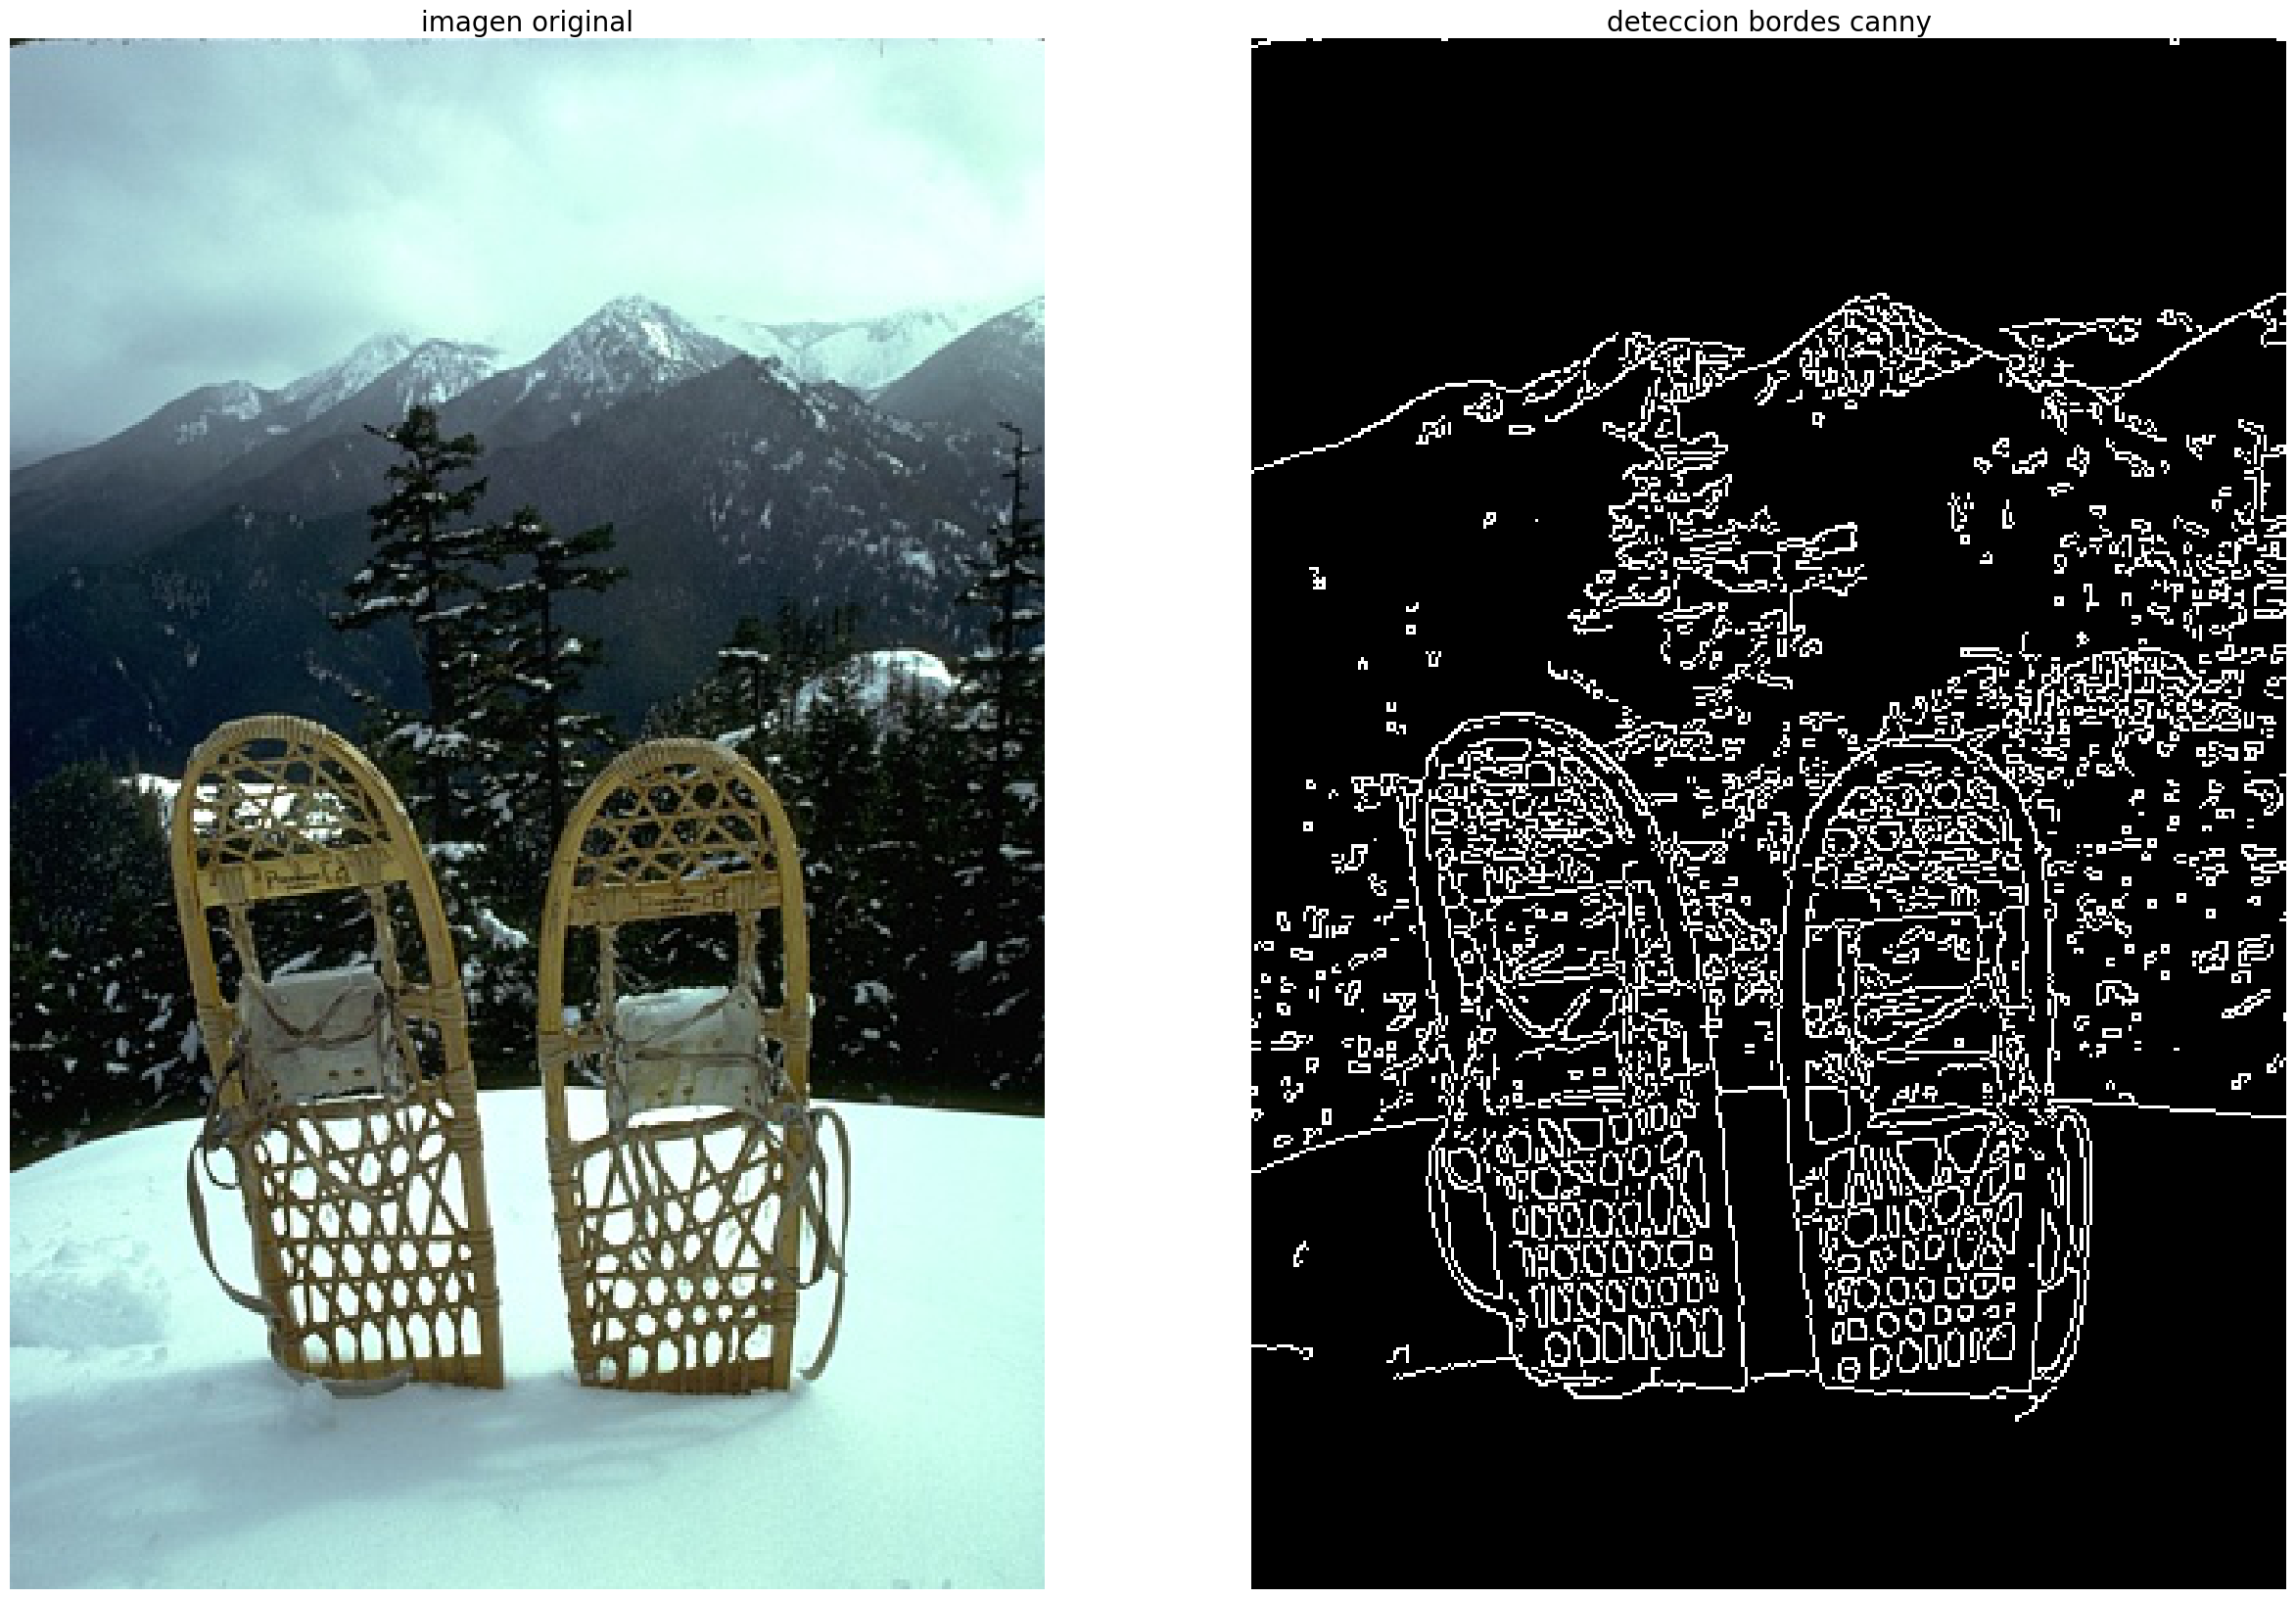

In [76]:
plt.figure(figsize=(30, 30))
plt.subplot(1, 2, 1)
plt.title('imagen original',fontsize=20)
plt.imshow(imagen)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('deteccion bordes canny',fontsize=20)
plt.imshow(edges, cmap="grey")
plt.axis('off')

    
    

In [77]:
np.unique(edges)

array([0, 1], dtype=uint8)

In [78]:
np.save(os.path.join(inter,"canny.npy"),edges)



(-0.5, 320.5, 480.5, -0.5)

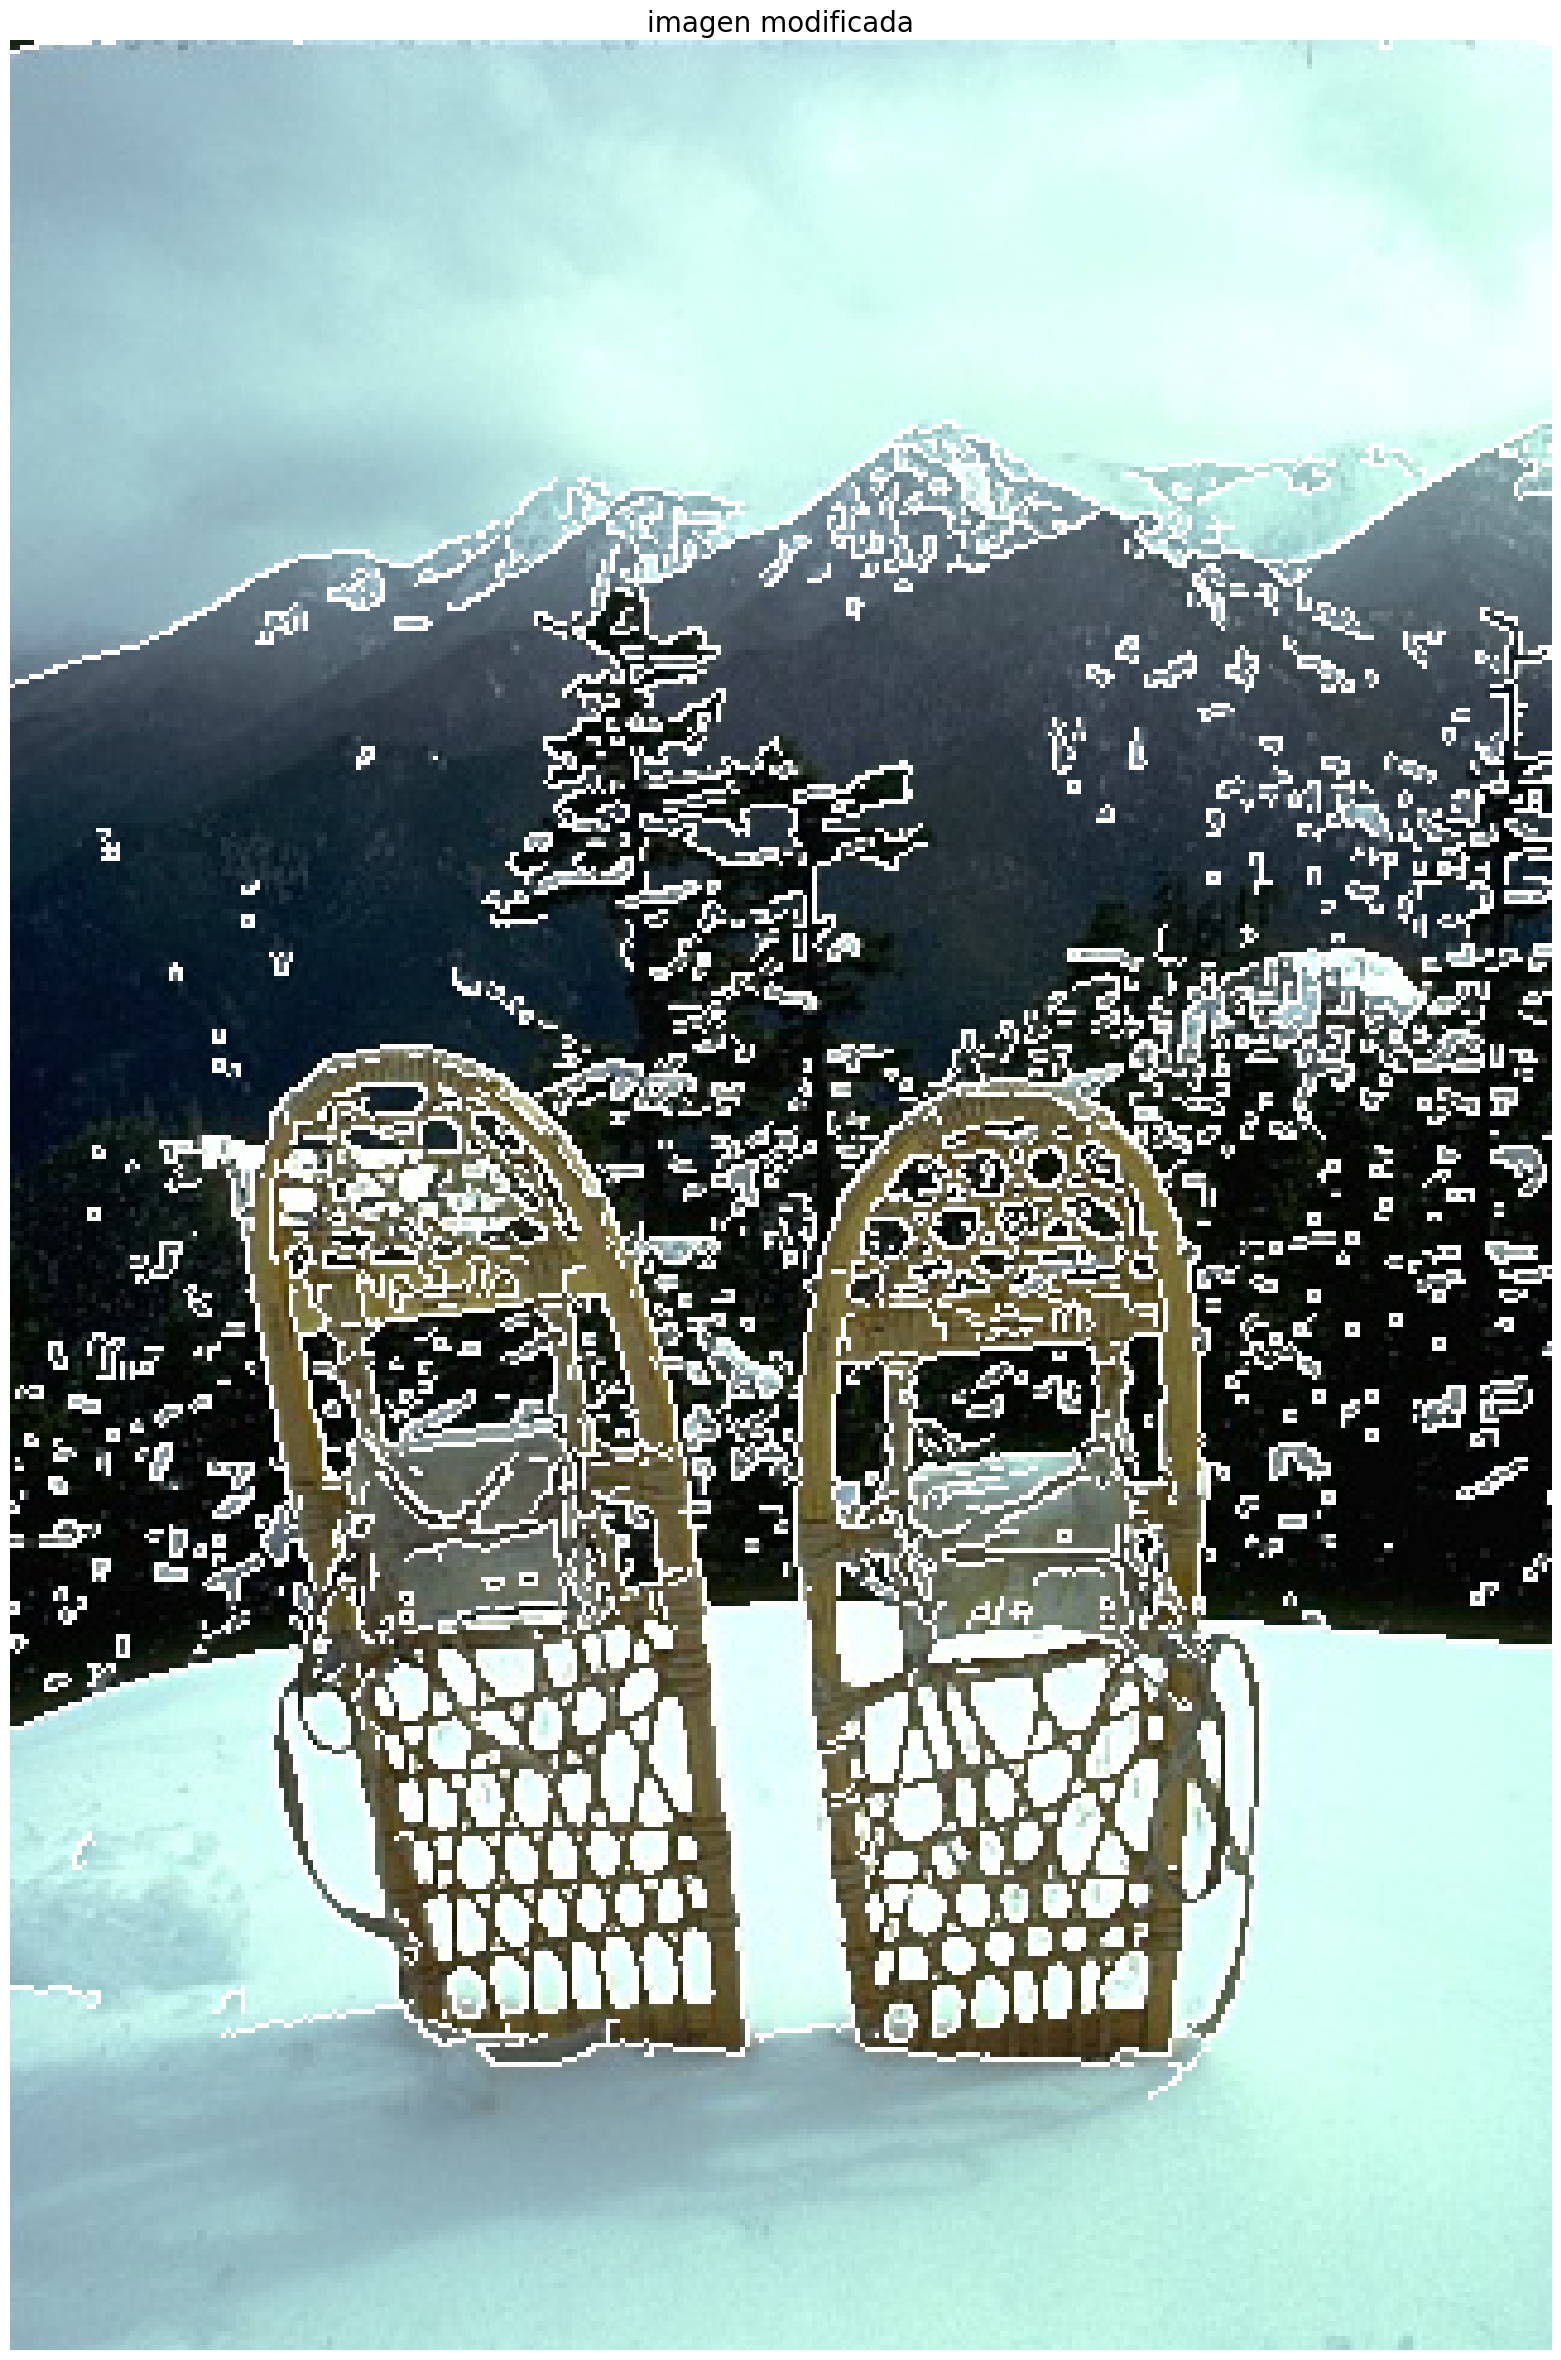

In [79]:
prueba=np.copy(image)
prueba[:,:,0]=np.where(edges==1,255,imagen[:,:,0])
prueba[:,:,1]=np.where(edges==1,255,imagen[:,:,1])
prueba[:,:,2]=np.where(edges==1,255,imagen[:,:,2])
io.imsave(os.path.join(inter,'prueba.jpg'), prueba)
plt.figure(figsize=(30, 30))

plt.title('imagen modificada',fontsize=20)
plt.imshow(prueba)
plt.axis('off')

In [80]:
np.unique(edges)

array([0, 1], dtype=uint8)